$
Assesment 2
$
<br>
$
\Huge Name-S.P.Prathapasinghe
$
<br>
$
Index No.-190470X
$
<br>
$
Github Link-https://github.com/PrathapasingheSP99/Image-Processing.git
$


$
\Huge Q1
$


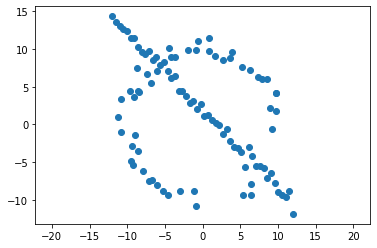

In [1]:
import numpy as np 
from scipy.optimize import minimize 
from scipy import linalg 
import matplotlib.pyplot as plt
import random
import cv2 as cv

# np.random. seed (0)
N = 100
half_n = N//2 
r = 10 
s = r/16 
t = np.random.uniform(0 , 2*np. pi , half_n )
n = s*np.random. randn( half_n ) 
x,y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b = -1,2
x=np.linspace(-12,12,half_n) 
y = m*x+b+s*np.random.randn(half_n )
X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X=np.vstack((X_circ,X_line))
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show()


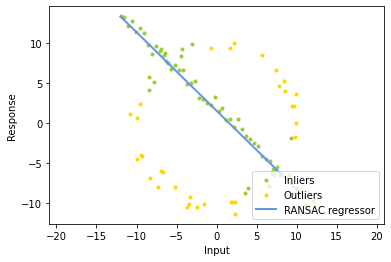

In [16]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model

X1=X[:,0].reshape(-1,1)
X2=X[:,1].reshape(-1,1)
#print(X1)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X1,X2)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X1.min(), X1.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

lw = 2
plt.scatter(X1[inlier_mask], X2[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(X1[outlier_mask], X2[outlier_mask], color="gold", marker=".", label="Outliers")

plt.plot(line_X,line_y_ransac,color="cornflowerblue",linewidth=lw,label="RANSAC regressor")
plt.axis('equal')
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [17]:
from numpy.linalg import inv
def Estimate_Circle(x0,y0,x1,y1,x2,y2,x3,y3,x4,y4):
    A=np.array([[x0,y0,1], [x1, y1,1],[x2,y2,1],[x3,y3,1], [x4, y4,1]])
    B=inv(np.matmul(A.T,A))
    C=np.array([[x0**2+y0**2],[x1**2+y1**2],[x2**2+y2**2],[x3**2+y3**2],[x4**2+y4**2]])
    P=np.matmul(np.matmul(B,A.T),C)
    Center_x=P[0]/2
    Center_y=P[1]/2
    radius=np.sqrt(Center_x**2+Center_y**2+P[2])
    return Center_x,Center_y,radius,P

#Center_x,Center_y,radius,P=Estimate_Circle(3,3,3,4,4,3)

In [18]:
def How_close(X,P):
    Y=np.append(X, np.ones((X.shape[0],1)), axis = 1)
    Y1=np.matmul(Y,P)
    Z=np.array(X[:,0].reshape(-1,1)**2+X[:,1].reshape(-1,1)**2)
    #print(Z)
    #Z.reshape(1,-1)
    #print(Z.shape)
    return np.sum(Z-Y1)
#How_close(X,P)



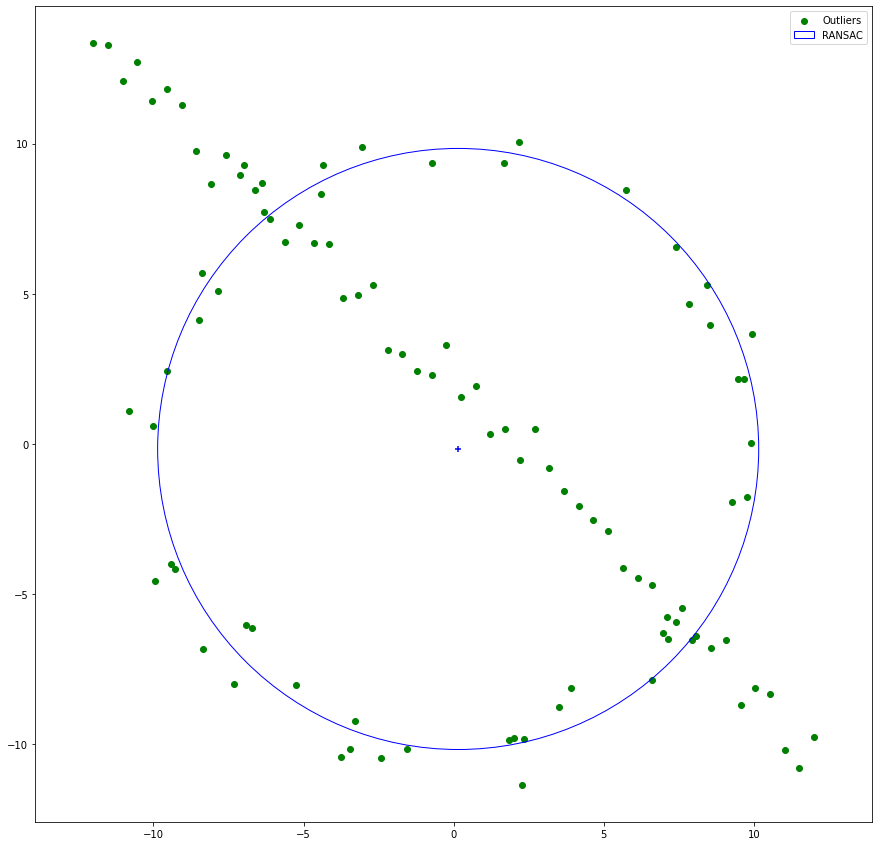

In [27]:
def RANSAC_circle(Cords ):
       
    it = 0
    prev_rating=0
    while it < 50:
        it += 1

        #print(it)
        ind = random.sample(range(0, len(Cords)), 5)
        #print(ind)
        x0, y0 = Cords[ind[0]]
        x1, y1 = Cords[ind[1]]
        x2, y2 = Cords[ind[2]]
        x3, y3 = Cords[ind[3]]
        x4, y4 = Cords[ind[4]]
        Center_x,Center_y,radius,P = Estimate_Circle(x0,y0,x1,y1,x2,y2,x3,y3,x4,y4)
        Rating=How_close(Cords,P)
        #print(np.append(Center_x,Rating))
        if it==1 or (prev_rating>Rating and Rating>0):
            prev_rating=Rating
            Circle=[Center_x,Center_y,radius]
    return Circle

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c='g', marker='o', label="Outliers")


a,b,r=RANSAC_circle(X)
circle_best_fit = plt.Circle((a, b), radius=r, color='b', fc='y', fill=False, label='RANSAC')
plt.gca().add_patch(circle_best_fit)
ax.scatter(a, b, c='b', marker='+')
ax.legend()
plt.show()



$
\Huge Q2
$

In [61]:
def clicked(event, x, y, flags, params):
    global clicks
    global pos
    if event == cv.EVENT_LBUTTONDOWN and clicks < 4:
        pos = np.vstack((pos, [x, y]))
        cv.circle(img,(x,y),8,(0,255,150),-1)
        cv.putText(img, "P{}".format(clicks), (x+10,y+10), cv.FONT_ITALIC, 1, (150,0,0), 2)
        cv.imshow('image', img)
        clicks += 1

In [63]:
def compute_Homography(pts1,pts2):
    A = []
    b = []
    for i in range(len(pts1)):
        s_x, s_y = pts1[i]
        d_x, d_y = pts2[i]
        A.append([-s_x, -s_y, -1, 0, 0, 0, (d_x)*(s_x), (d_x)*(s_y),d_x])
        A.append([0, 0, 0, -s_x, -s_y, -1, (d_y)*(s_x), (d_y)*(s_y),d_y])
    A = np.array(A)
    A=np.append(A,np.array([[0,0,0,0,0,0,0,0,1]]),axis=0)
    h = np.matmul(inv(A),np.array([[0],[0],[0],[0],[0],[0],[0],[0],[1]]))
    #print(h)
    return np.reshape(h, (3, 3))


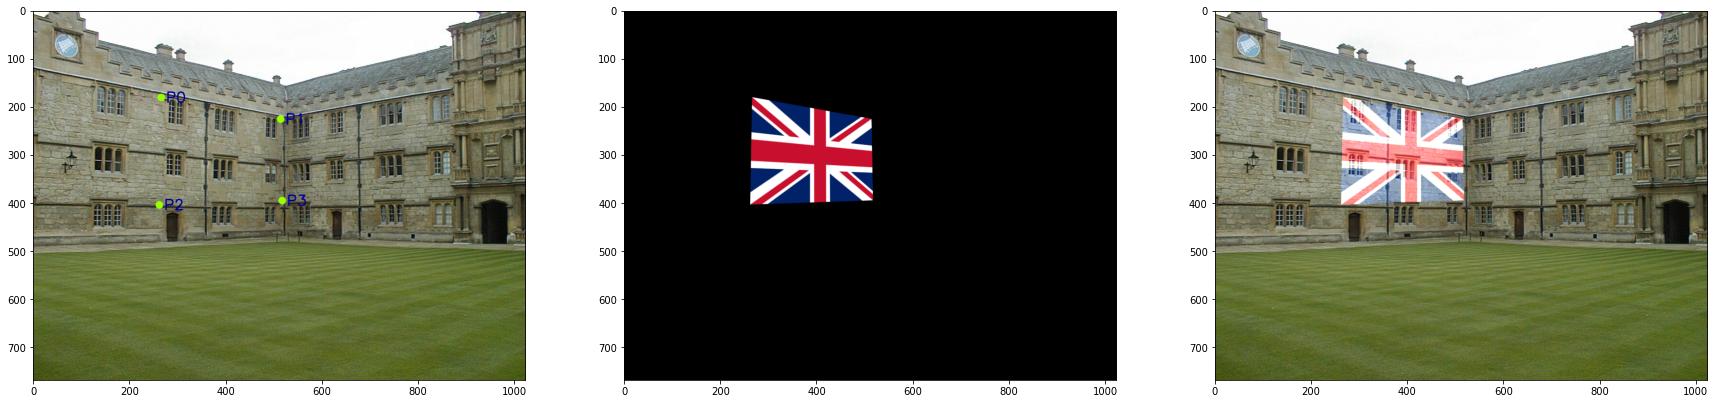

In [64]:
pos=np.empty((0,2))
clicks=0


img = cv.imread('001.jpg') 
img_1 = img.copy()

cv.imshow('image', img); cv.setMouseCallback('image', clicked); cv.waitKey(0); cv.destroyAllWindows()
flag = cv.imread('Flag.png') 
#print(flag.shape)
H,W,c=flag.shape

pts1=np.float32([[0,0],[W,0],[0,H],[W,H]])
pts2=np.float32(pos)
matrix=compute_Homography(pts1,pts2)
flag_Output=cv.warpPerspective(flag,matrix,img.shape[1::-1],)
#print(pts1,pts2,matrix)
Out=cv.addWeighted(img_1,1,flag_Output,0.7,0)

fig, ax = plt.subplots(1, 3, figsize = (30, 80))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(flag_Output,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(Out,cv.COLOR_BGR2RGB))
plt.show()


$
\Huge Q3
$

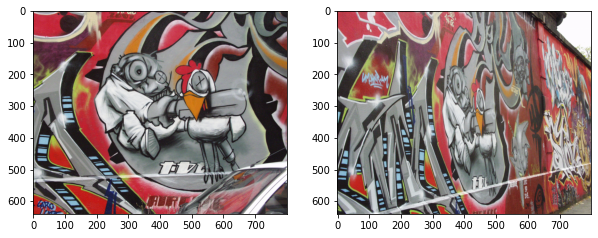

In [5]:
im=cv.imread('img1.ppm')
im1=cv.imread('img5.ppm')
fig, ax = plt.subplots(1, 2, figsize = (10, 20))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))